<a href="https://colab.research.google.com/github/K-Domar/MyRepo/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mean atom radius $a = \sum_{i = 1}^n \ c_ir_i$ \\
Atomic size difference  $\delta = \sqrt{\sum_{i = 1}^n \ c_i(1 - \frac{r_i}{a})^2}$ \\
Average of the melting points of
constituent elements $T_m = \sum_{i=1}^n c_iT_{mi}$ \\
Standard deviation of melting
temperature $\sigma_T = \sqrt{\sum_{i = 1}^n \ c_i(1 - \frac{T_i}{T_m})^2}$ \\
Average mixing enthalpy $\Delta H_{mix} = 4\sum_{i\neq j} c_ic_jH_{ji}$ \\
Standard deviation of mixing enthalpy $\sigma_{\Delta H} = \sqrt{\sum_{i\neq j} c_ic_j(H_{ji}-\Delta H_{mix})^2}$ \\
Ideal mixing entropy $S_{id}=-k_B \sum_{i=1}^n c_ilnc_i $ \\
Electronegativity $\chi=sum_{i=1}^n c_i\chi_{i} $ \\
Standard deviation of electronegativity $\Delta\chi= \sqrt{ \sum_{i=1}^n c_i(\chi_{i}-\chi)^2} $ \\
Average VEC $VEC=\sum_{i=1}^n c_iVEC_{i}$ \\
Standard deviation of VEC $\sigma_{VEC}=\sqrt{\sum_{i=1}^n c_i(VEC_{i}-VEC)^2}$ \\
Mean bulk modulus $K=\sum_{i=1}^n c_iK_{i} $ \\
Standard deviation of bulk modulus $\sigma_{K}=\sqrt{\sum_{i=1}^n c_i(K_{i}-K)^2} $ \\

In [8]:
HEA = pd.read_excel('https://raw.githubusercontent.com/K-Domar/MyRepo/main/dataset.xlsx')
print(HEA.columns)
HEA.head()

Index(['Alloy', 'No', 'Component', 'Fraction', 'a', 'delta', 'Tm', 'D_Tm',
       'Hmix', 'σHmix', 'Sid', 'Elec_nega', 'D_elec_nega', 'VEC', 'd_VEC',
       'BulkModulus', 'D_Bulk', 'Phase', 'Phase_inshort', 'AM？', 'IM?', 'SS?',
       'Phase_3', 'Ref', 'From', 'Size', 'Method'],
      dtype='object')


,Alloy,No,Component,Fraction,a,delta,Tm,D_Tm,Hmix,σHmix,Sid,Elec_nega,D_elec_nega,VEC,d_VEC,BulkModulus,D_Bulk,Phase,Phase_inshort,AM？,IM?,SS?,Phase_3,Ref,From,Size,Method
0,AlB12,2,Al B,1 12,0.867077,0.188079,2239.190000,376.928897,0.000000,0.000000,0.271189,2.006923,0.114582,3.000000,0.000000,3.012308e+11,65.018523,IM,IM,0,1,0,2.0,NaN,三元相图,NaN,NaN
1,B4Co,2,B Co,4 1,0.906200,0.190245,2232.000000,232.000000,-15.360000,3.456000,0.500402,2.008000,0.064000,4.200000,2.400000,2.920000e+11,56.000000,IM,IM,0,1,0,2.0,NaN,三元相图,NaN,NaN
2,AlB2,2,Al B,1 2,1.024000,0.281738,1876.490000,666.815837,0.000000,0.000000,0.636514,1.896667,0.202704,3.000000,0.000000,2.386667e+11,115.022703,IM,IM,0,1,0,2.0,NaN,三元相图,NaN,NaN
3,B6Co2Nb2,3,B Co Nb,6 2 2,1.028000,0.253786,2312.400000,313.581632,-41.440000,8.138784,0.950271,1.920000,0.171581,4.600000,2.332381,2.620000e+11,71.105555,IM,IM,0,1,0,2.0,NaN,三元相图,NaN,NaN
4,HfB2,2,Hf B,1 2,1.072667,0.333118,2400.666667,74.481914,-58.666667,3.456966,0.636514,1.793333,0.348839,3.333333,0.471405,2.500000e+11,98.994949,IM,IM,0,1,0,2.0,NaN,三元相图,NaN,NaN


In [9]:
hea = HEA.drop(columns=['Phase_3', 'Ref', 'From', 'Size', 'Method'])
hea.head()

,Alloy,No,Component,Fraction,a,delta,Tm,D_Tm,Hmix,σHmix,Sid,Elec_nega,D_elec_nega,VEC,d_VEC,BulkModulus,D_Bulk,Phase,Phase_inshort,AM？,IM?,SS?
0,AlB12,2,Al B,1 12,0.867077,0.188079,2239.190000,376.928897,0.000000,0.000000,0.271189,2.006923,0.114582,3.000000,0.000000,3.012308e+11,65.018523,IM,IM,0,1,0
1,B4Co,2,B Co,4 1,0.906200,0.190245,2232.000000,232.000000,-15.360000,3.456000,0.500402,2.008000,0.064000,4.200000,2.400000,2.920000e+11,56.000000,IM,IM,0,1,0
2,AlB2,2,Al B,1 2,1.024000,0.281738,1876.490000,666.815837,0.000000,0.000000,0.636514,1.896667,0.202704,3.000000,0.000000,2.386667e+11,115.022703,IM,IM,0,1,0
3,B6Co2Nb2,3,B Co Nb,6 2 2,1.028000,0.253786,2312.400000,313.581632,-41.440000,8.138784,0.950271,1.920000,0.171581,4.600000,2.332381,2.620000e+11,71.105555,IM,IM,0,1,0
4,HfB2,2,Hf B,1 2,1.072667,0.333118,2400.666667,74.481914,-58.666667,3.456966,0.636514,1.793333,0.348839,3.333333,0.471405,2.500000e+11,98.994949,IM,IM,0,1,0


In [10]:
# creat and add new parameter omega

omega = ((hea.Tm * hea.Sid) / abs(hea.Hmix)).replace(np.inf, 0)
hea['omega'] = omega
hea[hea.No == 5]

,Alloy,No,Component,Fraction,a,delta,Tm,D_Tm,Hmix,σHmix,Sid,Elec_nega,D_elec_nega,VEC,d_VEC,BulkModulus,D_Bulk,Phase,Phase_inshort,AM？,IM?,SS?,omega
37,Fe81Si2B13Nb3Cu1,5,Fe Si B Nb Cu,81 2 13 3 1,1.190520,0.123798,1901.967700,240.886222,-15.487200,5.619381,0.665402,1.852500,0.083431,7.210000,1.818213e+00,1.878000e+11,52.107197,BCC,SS,0,0,1,81.717317
42,Fe73.5Si13.5B9Nb3Cu,5,Fe Si B Nb Cu,73.5 13.5 9 3 1,1.197240,0.106167,1866.227700,231.267541,-24.069900,5.673845,0.864594,1.852150,0.075999,6.950000,1.915072e+00,1.737500e+11,51.782598,BCC,SS,0,0,1,67.035125
61,NiCoFeCrMo0.1Al0.3,5,Ni Co Fe Cr Mo Al,1 1 1 1 0.1 0.3,1.249585,0.014656,1896.731707,238.126224,-3.902439,1.694478,1.467148,1.828293,0.108962,8.195122,1.501536e+00,1.739024e+11,12.072555,FCC,SS,0,0,1,713.088745
62,CoCrCu0.5FeNi,5,Co Cr Cu Fe Ni,1 1 0.5 1 1,1.250222,0.008353,1814.641111,234.543555,0.493827,3.534534,1.581094,1.828889,0.094569,8.555556,1.640536e+00,1.688889e+11,12.862041,FCC,SS,0,0,1,5809.963382
63,CoCrCuFeNi,5,Co Cr Cu Fe Ni,1 1 1 1 1,1.253000,0.010332,1768.954000,261.333925,3.200000,4.051666,1.609438,1.836000,0.092217,8.800000,1.720465e+00,1.660000e+11,14.966630,FCC,SS,0,0,1,889.694260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,GdTbDyTmLu,5,Gd Tb Dy Tm Lu,1 1 1 1 1,1.730200,0.050718,1730.800000,128.948672,0.000000,0.000000,1.609438,1.208000,0.059127,3.000000,4.440892e-16,4.214000e+10,3.815547,HCP,SS,0,0,1,0.000000
594,SrCaYbMgZn,5,Sr Ca Yb Mg Zn,1 1 1 1 1,1.764800,0.152532,974.536000,155.770027,-13.120000,6.454964,1.609438,1.202000,0.255766,4.200000,3.919184e+00,3.497879e+10,20.970874,AM,AM,1,0,0,119.546889
595,YGdTbDyLu,5,Y Gd Tb Dy Lu,1 1 1 1 1,1.778600,0.013720,1727.000000,126.581199,0.000000,0.000000,1.609438,1.202000,0.056000,3.000000,4.440892e-16,4.134000e+10,3.541525,HCP,SS,0,0,1,0.000000
596,HoDyYGdTb,5,Ho Dy Y Gd Tb,1 1 1 1 1,1.784800,0.008091,1689.200000,77.056862,0.000000,0.000000,1.609438,1.194000,0.048000,3.000000,4.440892e-16,3.974000e+10,1.212601,HCP,SS,0,0,1,0.000000


In [11]:
print(hea.No.value_counts())

2    163
5    127
3    120
4     89
6     71
7     24
9      4
8      3
Name: No, dtype: int64


In [12]:
# high entropy alloy have a five or more component
heas = hea[hea.No >= 5]
heas.Phase_inshort.value_counts()

SS       114
AM        50
IM+SS     50
IM         9
AM+IM      6
Name: Phase_inshort, dtype: int64

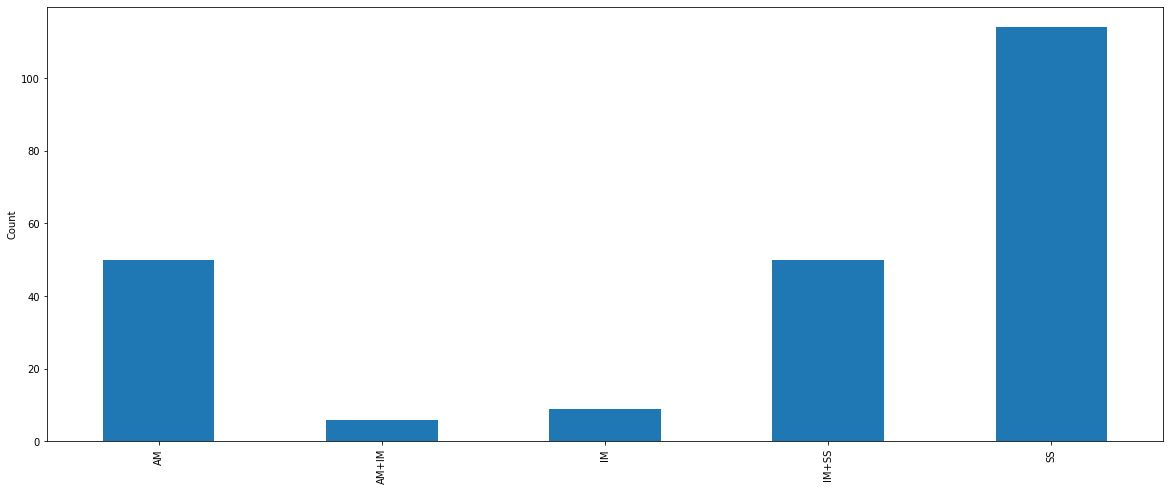

In [13]:
fig, ax = plt.subplots(figsize=(20,8))
heas.groupby('Phase_inshort').size().plot(kind='bar', ax=ax, width=0.5)
ax.set_xlabel('')
ax.set_ylabel('Count');

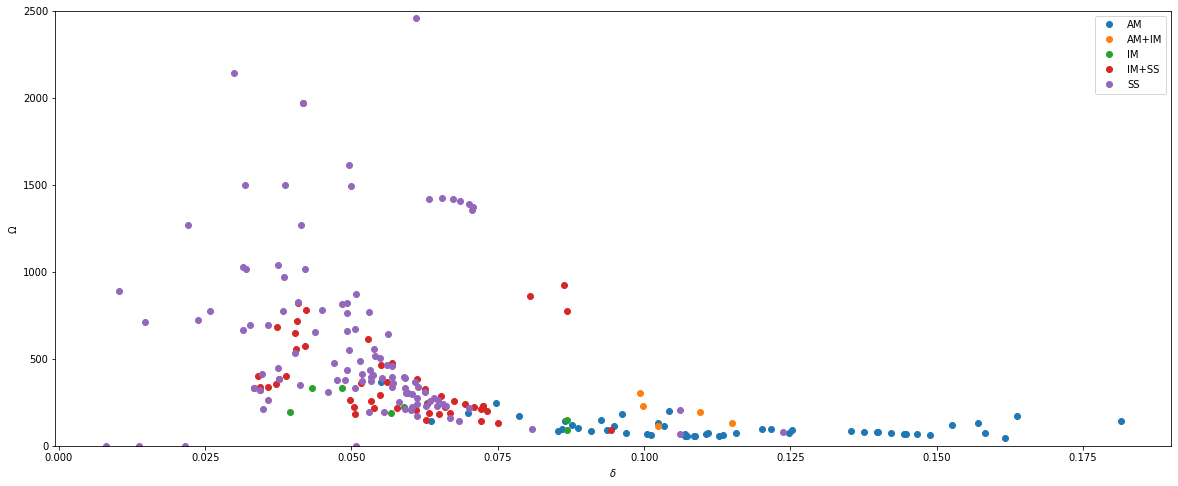

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
for name, df_phase in heas.groupby('Phase_inshort'):
  df_phase.plot('delta', 'omega', ax=ax, marker='.', markersize=12, linestyle='', label=name)
ax.set_ylim(0, 2500)
ax.set_xlabel(' $\delta$  ')
ax.set_ylabel(' $\Omega$  ')  ;
 

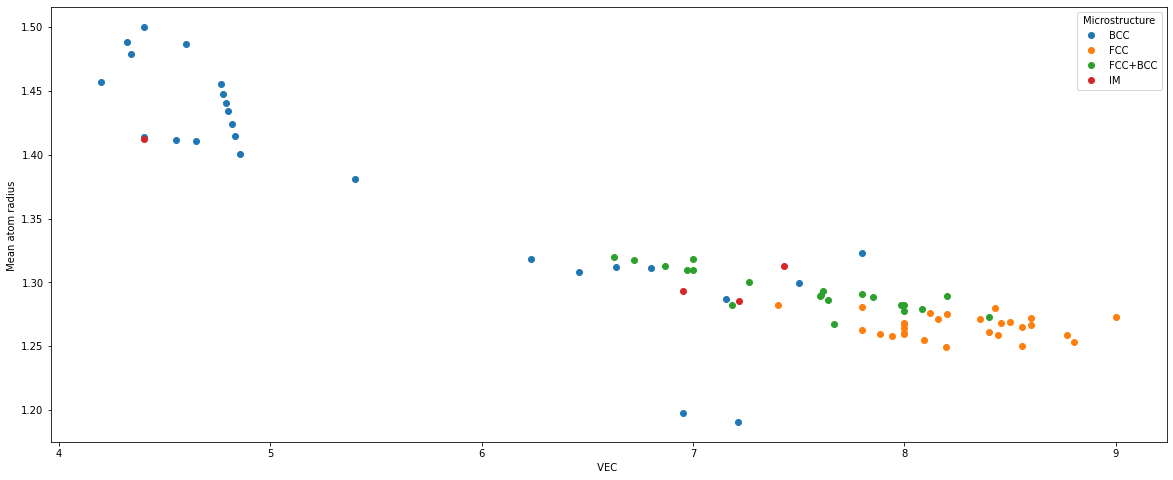

In [15]:
phase_to_include = ['FCC', 'BCC', 'FCC+BCC', 'IM']

#plot Valence electron concentration
fig, ax = plt.subplots(figsize=(20,8))
for name, df_phase in heas[heas.Phase.isin(phase_to_include)].groupby('Phase'):
  df_phase.plot('VEC', 'a', ax=ax, marker='.', markersize=12, linestyle='', label=name)
ax.set_xlabel(' VEC  ')
ax.set_ylabel(' Mean atom radius  ')
ax.legend(title='Microstructure')